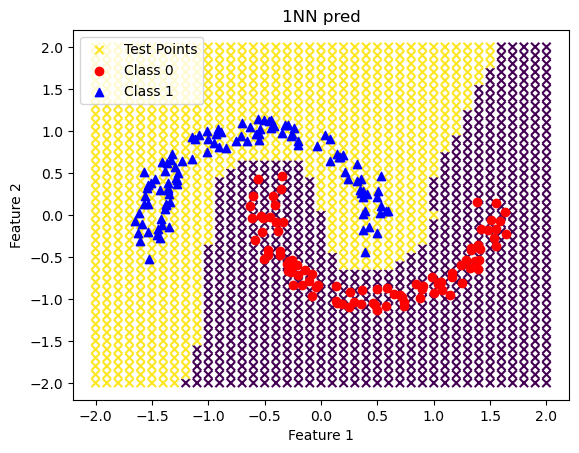

In [18]:
#1
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("D2z.txt")
X = data[:, :2]
y = data[:, 2] 
def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict(x, X, y):
    nn_label = nearest_neighbor(x, X, y)
    return nn_label

def nearest_neighbor(x, X, y):
    m_dist = np.inf
    m_index = -1
    for i in range(len(X)):
        dist = euclidean_dist(x, X[i])
        if dist < m_dist:
            m_dist = dist
            m_index = i
    return y[m_index]

x_min, x_max = -2, 2 
y_min, y_max = -2, 2 
h = 0.1
x_range=np.arange(x_min, x_max + h, h)
y_range=np.arange(y_min, y_max + h, h)
x_test=np.array([x for x in x_range])
y_test=np.array([y for y in y_range])
test_points=np.array([(x,y) for x in x_range for y in y_range])
Z = np.array([predict(x, X, y) for x in test_points])
plt.scatter(test_points[:, 0], test_points[:, 1], c=Z, marker='x', label='Test Points')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="r", marker="o", label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="b", marker="^", label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="upper left")
plt.title("1NN pred")
plt.show()


In [49]:
#2
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from threading import Thread

def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_pred(X_train, Y_train, X_test, k=1):
    y_pred = []
    for i in range(0,1000):
        x=X_test.iloc[i,:]
        all_dist = [] 
        for j in range(0,4000):
            x_train=X_train.iloc[j,:]
            y_train=Y_train.iloc[j]
            dist = euclidean_dist(x, x_train)
            all_dist.append((dist, y_train))
        all_dist.sort(key=lambda x: x[0])
        neighbors = all_dist[:k]
        total = [n[1] for n in neighbors]
        pred = max(set(total), key=total.count)
        y_pred.append(pred)
    return np.array(y_pred) 

df = pd.read_csv("emails.csv")
X = df.iloc[:, 1:-1] 
y = df.iloc[:, -1]
kf = KFold(n_splits=5)
fold = 1
for train_index, test_index in kf.split(X):
    print("Fold", fold)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    Y_pred = knn_pred(X_train, Y_train, X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print()
    fold += 1



Fold 1
Accuracy: 0.825
Precision: 0.6544943820224719
Recall: 0.8175438596491228

Fold 2
Accuracy: 0.853
Precision: 0.6857142857142857
Recall: 0.8664259927797834

Fold 3
Accuracy: 0.862
Precision: 0.7212121212121212
Recall: 0.8380281690140845

Fold 4
Accuracy: 0.851
Precision: 0.7164179104477612
Recall: 0.8163265306122449

Fold 5
Accuracy: 0.775
Precision: 0.6057441253263708
Recall: 0.7581699346405228



In [2]:
#3
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

def sigmoid(x):
    sig=1 / (1 + np.exp(-x))
    return sig

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for i in range(iterations):
        # the X here is samples * features and theta is features*1
        theta -= learning_rate*(((sigmoid(theta.transpose()@X.transpose())-y.transpose())@X).transpose())
    return theta

df = pd.read_csv("emails.csv")
X = df.iloc[:, 1:-1]
y_temp = df.iloc[:, -1]   
kf = KFold(n_splits=5)
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_temp.iloc[train_index], y_temp.iloc[test_index]
    y = np.zeros((4000, 1))
    for i in range(0,4000):
        y[i][0]=y_train.iloc[i]
    theta = np.zeros((X_train.shape[1],1))
    learning_rate = 0.03
    iterations = 1000
    theta= gradient_descent(X_train, y, theta, learning_rate, iterations)
    y_pred = sigmoid(X_test @ theta)
    y_pred[0]=[1 if x >= 0.5 else 0 for x in y_pred[0]]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("Fold", fold)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print()
    fold += 1



Fold 1
Accuracy: 0.91
Precision: 0.8884462151394422
Recall: 0.7824561403508772

Fold 2
Accuracy: 0.9
Precision: 0.797979797979798
Recall: 0.855595667870036

Fold 3
Accuracy: 0.883
Precision: 0.8957345971563981
Recall: 0.6654929577464789

Fold 4
Accuracy: 0.877
Precision: 0.8275862068965517
Recall: 0.7346938775510204

Fold 5
Accuracy: 0.834
Precision: 0.8181818181818182
Recall: 0.5882352941176471



In [53]:
#4
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from statistics import mean

def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
#as it is a brute force approoach to predicition, it will take a while to run
def knn_pred(X_train, Y_train, X_test, k=1):
    y_pred = []
    for i in range(0,1000):
        x=X_test.iloc[i,:]
        all_dist = [] 
        for j in range(0,4000):
            x_train=X_train.iloc[j,:]
            y_train=Y_train.iloc[j]
            dist = euclidean_dist(x, x_train)
            all_dist.append((dist, y_train))
        all_dist.sort(key=lambda x: x[0])
        neighbors = all_dist[:k]
        total = [n[1] for n in neighbors]
        pred = max(set(total), key=total.count)
        y_pred.append(pred)
    return np.array(y_pred) 

df = pd.read_csv("emails.csv")
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
accuracy_final=[]
for k in [1,3,5,7,10]:
    print(f"k={k}")
    accuracy=[]
    kf = KFold(n_splits=5)
    fold = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
        Y_pred = knn_pred(X_train, Y_train, X_test,k)
        accuracy_temp = accuracy_score(Y_test, Y_pred)
        accuracy.append(accuracy_temp)
        fold += 1
    accuracy_final.append(mean(accuracy))
    print(f"accuracy={mean(accuracy)}")


k=1
accuracy=0.8331999999999999
k=3
accuracy=0.8422
k=5
accuracy=0.8408
k=7
accuracy=0.8462
k=10
accuracy=0.8556


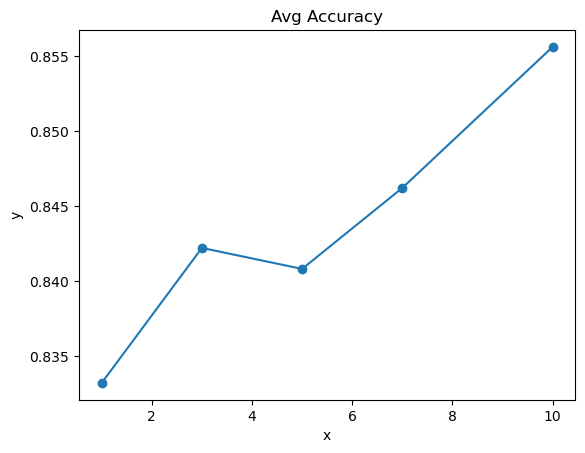

In [56]:
#4 graph
import matplotlib.pyplot as plt
x = [1, 3, 5, 7, 10]
y = accuracy_final
plt.plot(x, y, marker='o')
plt.title('Avg Accuracy')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

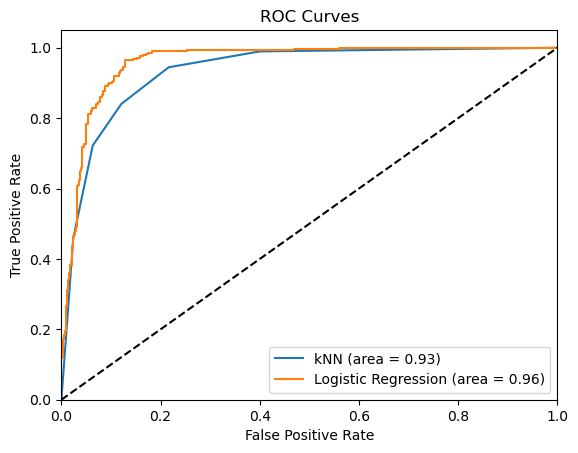

In [101]:
#5
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from threading import Thread
from statistics import fmean
import warnings

warnings.filterwarnings('ignore')
def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_prob(X_train, Y_train, X_test, k=5):
    y_pred = []
    for i in range(0,1000):
        x=X_test.iloc[i,:]
        all_dist = [] 
        for j in range(0,4000):
            x_train=X_train.iloc[j,:]
            y_train=Y_train.iloc[j]
            dist = euclidean_dist(x, x_train)
            all_dist.append((dist, y_train))
        all_dist.sort(key=lambda x: x[0])
        neighbors = all_dist[:k]
        total = [n[1] for n in neighbors]
        probability = fmean(total)
        y_pred.append(probability)
    return np.array(y_pred)

df = pd.read_csv("emails.csv")
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Y_prob = knn_prob(X_train, y_train, X_test)
fpr_knn, tpr_knn, _ = roc_curve(y_test, Y_prob)
auc_knn = auc(fpr_knn, tpr_knn)
#logistic regression
def sigmoid(x):
    sig=1 / (1 + np.exp(-x))
    return sig

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for i in range(iterations):
        theta -= learning_rate*(((sigmoid(theta.transpose()@X.transpose())-y.transpose())@X).transpose())
    return theta

df = pd.read_csv("emails.csv")
X = df.iloc[:, 1:-1]
y_temp = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y_temp, test_size=0.2, random_state=42)
y = np.zeros((4000, 1))
for i in range(0,4000):
    y[i][0]=y_train.iloc[i]
theta = np.zeros((X_train.shape[1],1))
learning_rate = 0.05
iterations = 1000
theta= gradient_descent(X_train, y, theta, learning_rate, iterations)
y_prob = X_test @ theta
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob)
auc_log = auc(fpr_log, tpr_log)
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.plot(fpr_knn, tpr_knn, label='kNN (area = %0.2f)' % auc_knn)
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = %0.2f)' % auc_log)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()
